In [25]:
#Step 1: Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")



In [26]:
#  Step 2: Load Dataset 
df = pd.read_csv("train.csv")

# Quick look
print(df.head())
print(df.info())



   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [27]:
# Step 3: Prepare Data 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Create Month column as datetime (safe for plotting)
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()



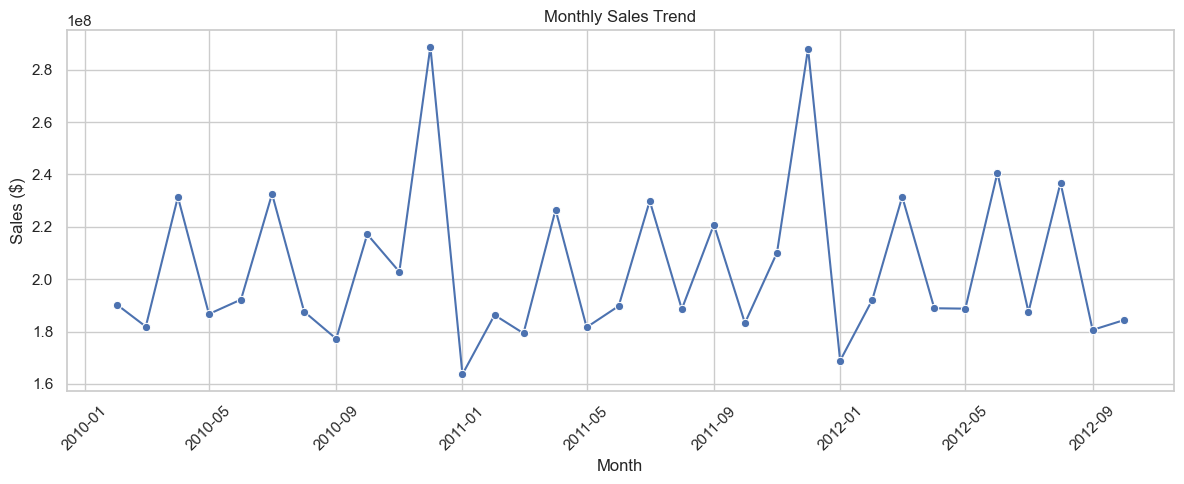

In [28]:
# Step 4: Monthly Sales Trend 
monthly_sales = df.groupby('Month', as_index=False)['Weekly_Sales'].sum()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()



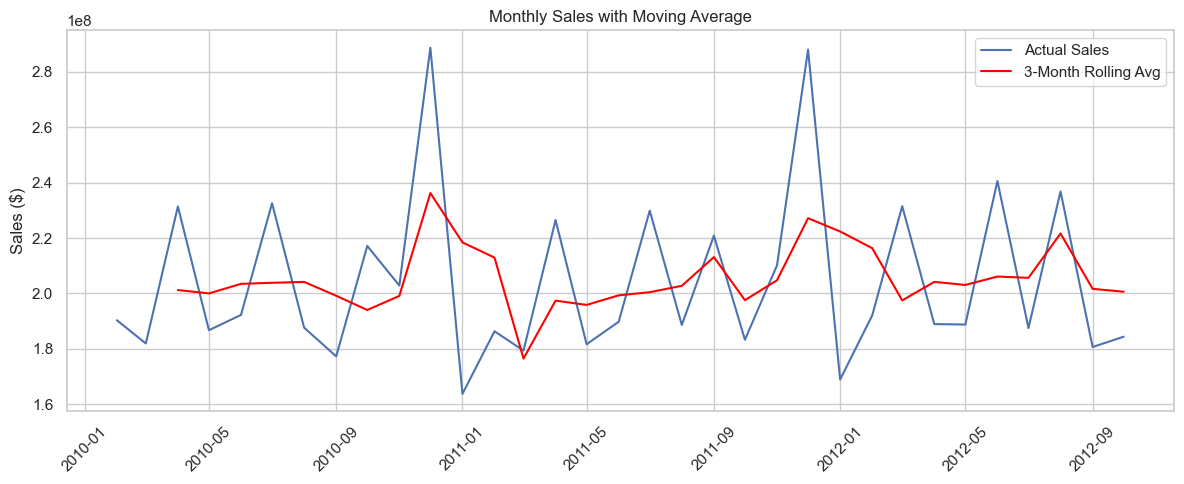

In [29]:
#  Step 5: Moving Average
monthly_sales['Rolling_Mean'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], label='Actual Sales')
plt.plot(monthly_sales['Month'], monthly_sales['Rolling_Mean'], label='3-Month Rolling Avg', color='red')
plt.xticks(rotation=45)
plt.title("Monthly Sales with Moving Average")
plt.ylabel("Sales ($)")
plt.legend()
plt.tight_layout()
plt.show()



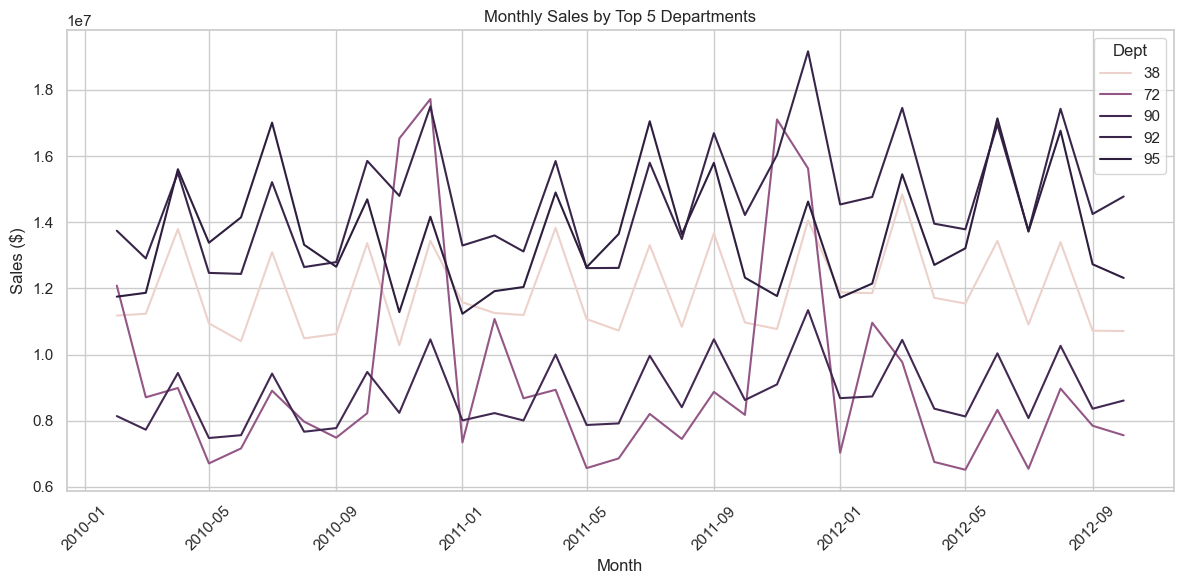

In [30]:
#Step 6: Breakdown by Department 

df['Dept'] = pd.to_numeric(df['Dept'], errors='coerce')

dept_sales = df.groupby(['Month','Dept'], as_index=False)['Weekly_Sales'].sum()


top_depts = dept_sales.groupby('Dept')['Weekly_Sales'].sum().nlargest(5).index
dept_sales = dept_sales[dept_sales['Dept'].isin(top_depts)]

plt.figure(figsize=(12,6))
sns.lineplot(data=dept_sales.sort_values('Month'),
             x='Month', y='Weekly_Sales', hue='Dept')
plt.xticks(rotation=45)
plt.title("Monthly Sales by Top 5 Departments")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


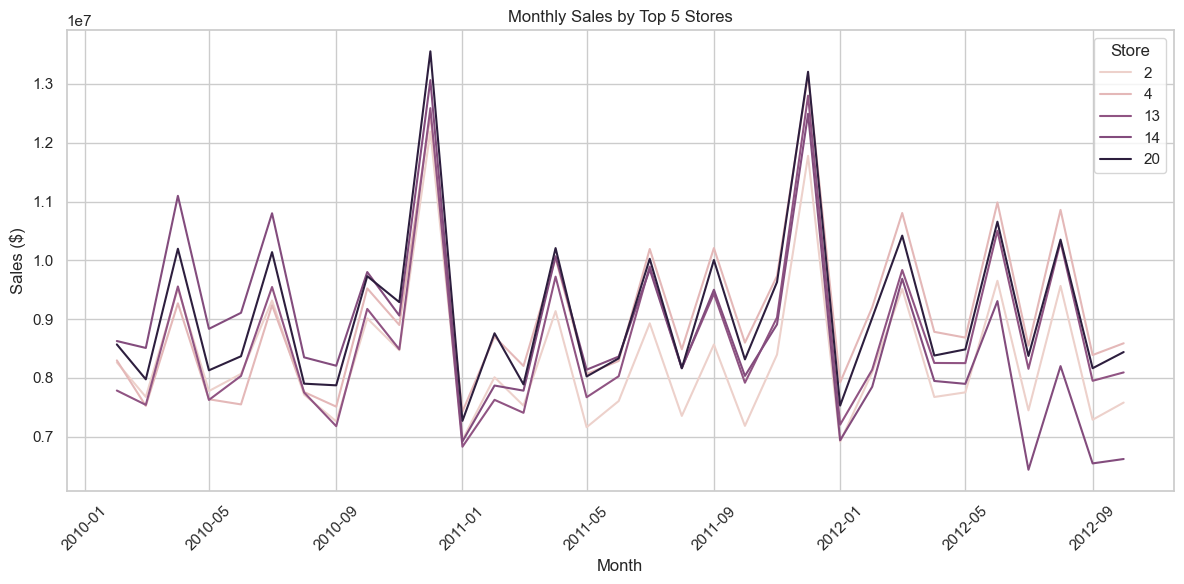

In [31]:
# Step 7: Breakdown by Store 
store_sales = df.groupby(['Month','Store'], as_index=False)['Weekly_Sales'].sum()

top_stores = store_sales.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index
store_sales = store_sales[store_sales['Store'].isin(top_stores)]

plt.figure(figsize=(12,6))
sns.lineplot(data=store_sales.sort_values('Month'),
             x='Month', y='Weekly_Sales', hue='Store')
plt.xticks(rotation=45)
plt.title("Monthly Sales by Top 5 Stores")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()
